In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

## The Gaussian Assumption
 - Standard simplifying assumption asset returns are normally distributed
 
### Skewness

$$ S(R) = \frac{E\left[\left(R-E\left(R\right)\right)^3\right]}{\sigma_R^3} $$


### Kurtosis


$$ S(R) = \frac{E\left[\left(R-E\left(R\right)\right)^4\right]}{\sigma_R^4} $$


### Downside Risk Measures
 - Semi-deviation: The volatility of the sub-sample of below-average or below-zero returns
 - Value-at-Risk: Represents the maximum "expected" loss over a given time period; Maximum potential loss threshold
 - Conditinal Var: Expected loss beyond VAR
 
### Semi-deviation

$$ {\sigma}_{semi} = \sqrt{{\large\frac{1}{N}}{\sum\limits _{R_t\leq\bar{R}}}{\left(R_i - \bar{R}\right)^2}} $$


### Value At Risk

$$ {\sigma}_{semi} = \sqrt{{\large\frac{1}{N}}{\sum\limits _{R_t\leq\bar{R}}}{\left(R_i - \bar{R}\right)^2}}$$


### Conditional VAR

$${CVaR} = -{E}\left(R | R\leq{-VaR}\right) = \frac{-\Large\int_{-\small\infty}^{-\small{VaR}}{x}\cdot{f}_{\small{R}}{\left(x\right)}{dx}}{{F_R}{\left({-VaR}\right)}}$$

### Lab Session

In [2]:
# Deviations from Normality 

import edhec_risk_kit as erk

In [3]:
hfi = erk.get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


### Probability Histogram of Returns of Different Strategies

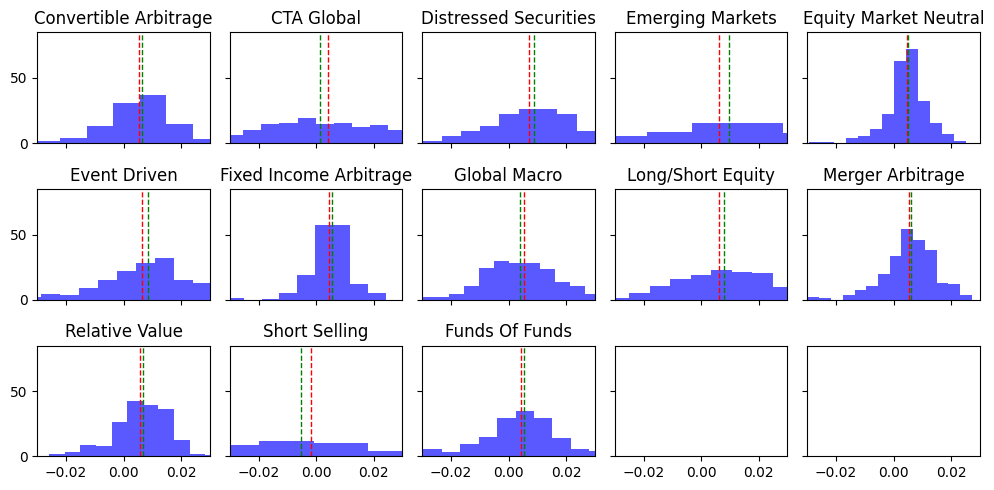

In [4]:
# Plot hedge fund strategies above are normally distributed
fig, axes = plt.subplots(3, 5, figsize=(10,5), dpi=100, sharex=True, sharey=True)

kwargs = dict(alpha=0.65, bins=20, density=True, stacked=True)


for i, (strat, ax) in enumerate(zip(hfi.columns.values, axes.flatten())):
    x = hfi[strat]
    ax.hist(x, **kwargs, label=str(strat), color='b')
    ax.axvline(x.mean(), color='r', linestyle='dashed', linewidth=1)
    ax.axvline(x.median(), color='g', linestyle='dashed', linewidth=1)
    ax.set_title(str(strat))

ax.set_xlim(-0.03, 0.03); ax.set_ylim(0, 85)
fig.tight_layout()
plt.show()

In [5]:
skew_check = pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis='columns')
skew_check.columns = ['Mean', 'Median', 'Mean > Median']
skew_check

,Mean,Median,Mean > Median
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


In [6]:
erk.skewness(hfi)

Convertible Arbitrage    -2.639592
CTA Global                0.173699
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Equity Market Neutral    -2.124435
Event Driven             -1.409154
Fixed Income Arbitrage   -3.940320
Global Macro              0.982922
Long/Short Equity        -0.390227
Merger Arbitrage         -1.320083
Relative Value           -1.815470
Short Selling             0.767975
Funds Of Funds           -0.361783
dtype: float64

In [7]:
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [8]:
# Sanity check
normal_rets1 = np.random.normal(0, 0.15, size=(263, 1))

skw1 = erk.skewness(normal_rets1)
skw2 = scipy.stats.skew(normal_rets1)

print(skw1, skw2[0])

0.05523425549472517 0.05523425549472514


In [9]:
# NOTE: kurtosis function does not subtract 3 from the output
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [10]:
scipy.stats.kurtosis(hfi)

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])

In [11]:
# Sanity check
normal_rets2 = np.random.normal(0, 0.15, size=(263, 1))

krt1 = erk.kurtosis(normal_rets2)
krt2 = scipy.stats.kurtosis(normal_rets2)

print(krt1, krt2[0])

2.978314018430996 -0.021685981569004475


In [12]:
# Jarque-Bera test - a test of level of significance
#    perform the Jarque-Bera goodness of fit test on sample data
#    tests whether the sample data has the skewness and kurtosis matching a normal distribution
#    jb_value --> test statistic
#    p-value  --> p-value for the hypothesis test
jbtest = scipy.stats.jarque_bera(normal_rets2)
jbtest

Jarque_beraResult(statistic=0.008650596157794342, pvalue=0.995684042550983)

In [13]:
scipy.stats.jarque_bera(hfi['Convertible Arbitrage'])

Jarque_beraResult(statistic=4812.703130094962, pvalue=0.0)

In [14]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [15]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [16]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [17]:
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [18]:
ffme.aggregate(erk.is_normal)

SmallCap    False
LargeCap    False
dtype: bool